In [1]:
import cv2, sys, re

#jupyterで画像表示するためのライブラリの準備
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# 入力ファイルを指定 --- (※1)
'''
if len(sys.argv) <= 1:
    print("no input file")
    quit()
'''
#image_file = sys.argv[1] 
image_file ="face2.jpg"

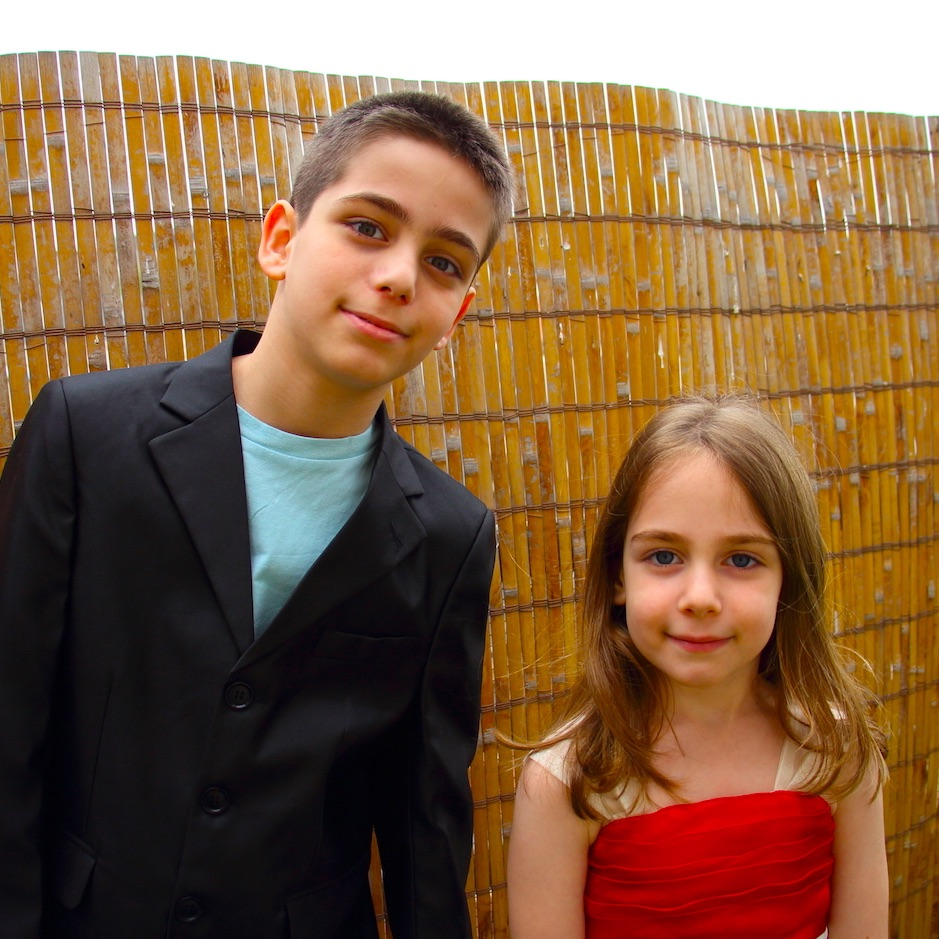

In [3]:
#見てみる(face1.jpg)
Image(filename = image_file, width=400, height=400)

In [4]:
# 出力ファイル名
output_file = re.sub(r'\.jpg|jpeg|png$', '-mosaic.jpg', image_file)
mosaic_rate = 30 

In [5]:
# カスケードファイルのパスを指定
cascade_file = "haarcascade_frontalface_alt.xml"

In [6]:
# 画像の読み込み --- (※2)
image = cv2.imread(image_file)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # グレイスケール変換
cv2.imwrite("grayimage-mosaic.png",image_gs)

True

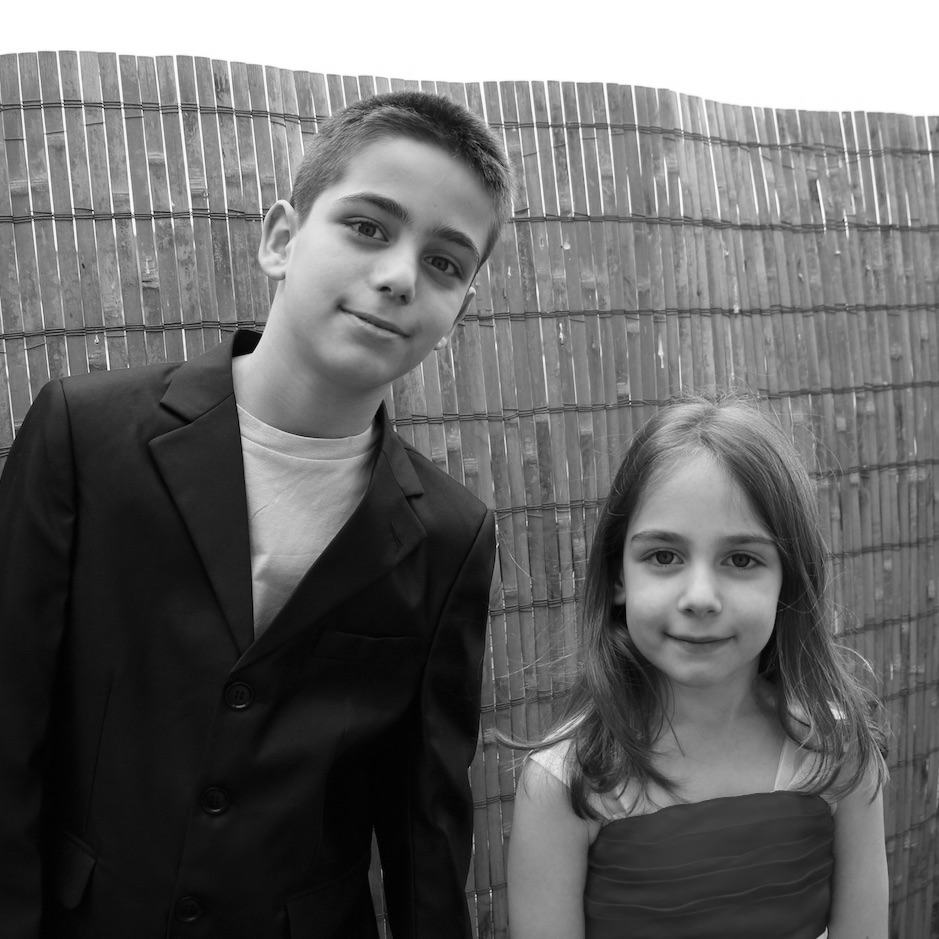

In [7]:
#見てみる
Image(filename = "grayimage-mosaic.png", width=400, height=400)

In [8]:
# 顔認識を実行 --- (※3)
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(100,100))

In [9]:
if len(face_list) == 0:
    print("no face")
    quit()

In [14]:
# 認識した部分にモザイクをかける -- (*4)
print(face_list)
color = (0, 0, 255)
for (x,y,w,h) in face_list:
    # 顔を切り抜く --- (※5)
    face_img = image[y:y+h, x:x+w]
    # 切り抜いた画像を指定倍率で縮小 --- (※6)
    face_img = cv2.resize(face_img, (w//mosaic_rate, h//mosaic_rate))
    # 縮小した画像を元のサイズに戻す --- (※7)
    face_img = cv2.resize(face_img, (w, h), 
        interpolation=cv2.INTER_CUBIC)#INTER_AREA,INTER_NEAREST
    # 元の画像に貼り付ける --- (※8)
    image[y:y+h, x:x+w] = face_img
# 描画結果をファイルに書き込む
cv2.imwrite(output_file, image)

[[293 142 239 239]
 [599 481 205 205]]


True

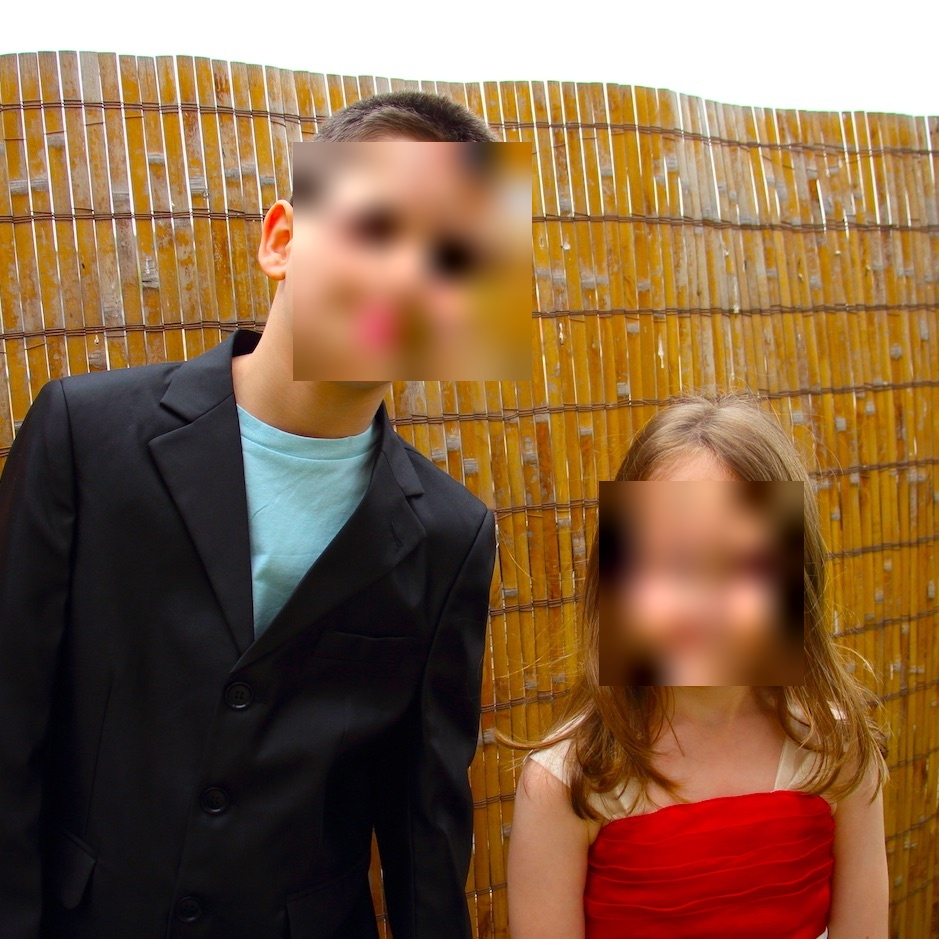

In [15]:
#見てみる
Image(filename ="face2-mosaic.jpg", width=400, height=400)